In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


Does the Experiment Page Drive Higher Traffic Than the Control Page ?

In [4]:
control_df = df.query('group == "control"')

In [5]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [7]:
control_ctr

0.2797118847539016

In [8]:
experiment_df = df.query('group == "experiment"')

In [9]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [10]:
experiment_ctr

0.3097463284379172

In [11]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [14]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique() 
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

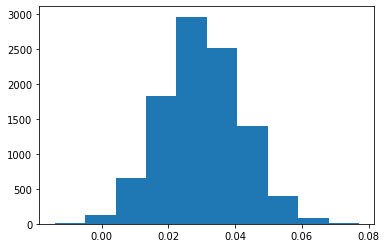

In [16]:
plt.hist(diffs);

In [17]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffsfs.std(), diffs.size)

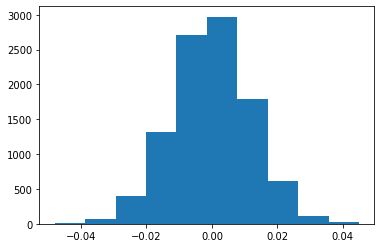

In [18]:
plt.hist(null_valsll_vals);

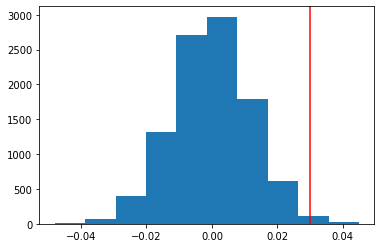

In [20]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color='red');

In [21]:
(null_vals > obs_diff).mean()

0.0057

Let's recap the steps we took to analyze the results of this A/B test.

We computed the observed difference between the metric, click through rate, for the control and experiment group.
We simulated the sampling distribution for the difference in proportions (or difference in click through rates).
We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
We used this p-value to determine the statistical significance of our observed difference.

Based on these results, we can reject the null hypothesis, and it looks like Audacity should launch new version of their homepage.